In [2]:
!pip install -Uqq fastai "duckduckgo_search>=6.2"
from duckduckgo_search import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 845.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.4 MB/s eta 0:00:00


In [3]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(keywords, max_images=200):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot("image")

    #DDG() is an instance of duckduckgo
    #image(....) is a method in class DDG
    #itemgot('image') helps filter the other data and returns the image URL

In [17]:
urls = search_images("Toyota", max_images=1)
urls[0] #returns the first url in the fastcore enhanced list

'https://images.carexpert.com.au/resize/3000/-/app/uploads/2023/01/2023-Toyota-Corolla-ZR-Hybrid-12.jpg'

In [18]:
#imports fastdownload t download file efficiently
from fastdownload import download_url

#sets the destination of the url
destination = "Toyota.jpg"

download_url(urls[0], destination, show_progress = False)

Path('Toyota.jpg')

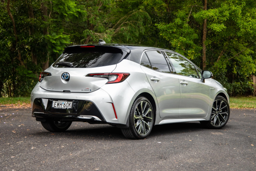

In [19]:
from fastai.vision.all import *

#open the image and store it in variable - im
im = Image.open('Toyota.jpg')

#resize the image
im.to_thumb(256,256)

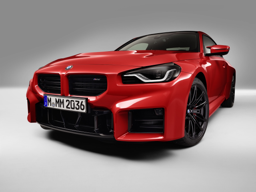

In [20]:
urls = search_images('BMW', max_images=5)
download_url(urls[0], "BMW.jpg", show_progress=False)
im = Image.open("BMW.jpg")
im.to_thumb(256,256)

In [26]:

searches = ['Toyota','Mercedes-Benz','BMW','Ford','Tesla']

path= Path("car_images")

for brand in searches:
    destination = (path/brand)  #set up the main directory - car_image/Toyota
    destination.mkdir(exist_ok=True, parents=True) #Ensures the folder exist
    download_images(destination, urls=search_images(f'{brand}')) #Searches and downloads the images
    time.sleep(5)
    resize_images(path/brand, max_size=400, destination=path/brand) #Resizes images to 400px max size.

In [27]:
failed = verify_images(get_image_files(path)) #fetch the bad images
failed.map(Path.unlink) #delete them
len(failed)

53

In [28]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method="squish")],
     batch_tfms=[
        *aug_transforms(size=192, flip_vert=True, max_rotate=10.0,
                        max_zoom=1.2, max_lighting=0.2, max_warp=0.2),
        Normalize.from_stats(*imagenet_stats)
    ]
).dataloaders(path, bs=32)

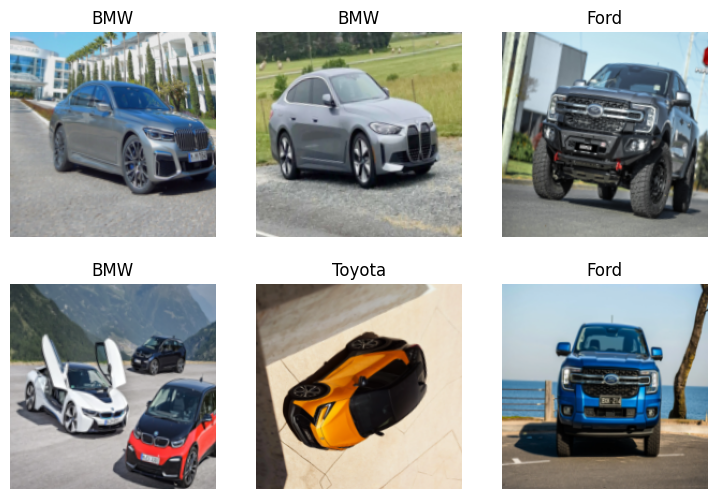

In [33]:
dls.show_batch(max_n=6)

epoch,train_loss,valid_loss,error_rate,time
0,2.264812,1.448223,0.445122,04:35


epoch,train_loss,valid_loss,error_rate,time
0,1.577590,1.018497,0.381098,06:01
1,1.399758,0.880922,0.304878,06:03
2,1.149392,0.738492,0.268293,06:41
3,0.958173,0.607617,0.204268,06:02
4,0.806936,0.537285,0.164634,06:03
5,0.657110,0.439637,0.128049,06:02
6,0.555390,0.396141,0.115854,06:02
7,0.486531,0.408544,0.115854,06:04


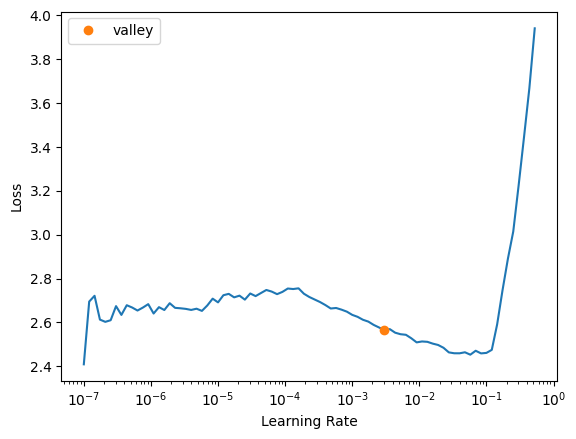

In [30]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.lr_find()
learn.fine_tune(8)

In [38]:
is_car, _, probs = learn.predict(PILImage.create("Toyota.jpg"))
print(f"This is a: {is_car}")
print(f"Probability: {probs.max():.4f}")

This is a: Toyota
Probability: 0.9996


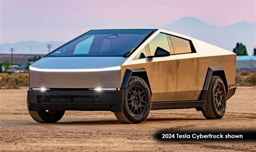

In [39]:
urls = search_images('Tesla', max_images=5)
download_url(urls[0], "Tesla.jpg", show_progress=False)
im = Image.open("Tesla.jpg")
im.to_thumb(256,256)

In [40]:
is_car, _, probs = learn.predict(PILImage.create("Tesla.jpg"))
print(f"This is a: {is_car}")
print(f"Probability: {probs.max():.4f}")

This is a: Tesla
Probability: 0.9985
